# Simulator Client

This version uses the end-to-end simulator library rather than doing work itself.

In [1]:
import cupy as cp
import viz_cuda
import simulation
from pyinstrument import Profiler
from pyinstrument.renderers import ConsoleRenderer

profiler = Profiler()

mempool = cp.get_default_memory_pool()
mempool.free_all_blocks()
print(f"mempool.used_bytes {mempool.used_bytes()}")

results = simulation.SimulationResult()
simulator = simulation.Simulator(results, waves = 20, bundles = 20000000, bundle_size = 1)

mempool.used_bytes 0


/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


In [2]:
profiler.reset()
profiler.start()

#simulator.run()
simulator.run_all_waves()

session = profiler.stop()
profile_renderer = ConsoleRenderer(unicode=True, color=True, show_all=True)
print(profile_renderer.render(session))


  _     ._   __/__   _ _  _  _ _/_   Recorded: 13:53:47  Samples:  1021
 /_//_/// /_\ / //_// / //_'/ //     Duration: 9.112     CPU time: 9.084
/   _/                      v4.2.0

Program: /home/joel/.local/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/joel/.local/share/jupyter/runtime/kernel-b418548c-0c3d-49b0-a457-49104fbbde86.json

9.111 run_code  IPython/core/interactiveshell.py:3400
└─ 9.111 <module>  <ipython-input-2-9ea745b9c55a>:5
   └─ 9.111 run_all_waves  simulation.py:347
      └─ 9.111 run  simulation.py:351
         ├─ 6.517 histogram  simulation.py:192
         │  ├─ 5.296 one_histogram  simulation.py:161
         │  │  └─ 5.272 ndarray.get  <built-in>:0
         │  ├─ 0.791 one_histogram_theta  simulation.py:128
         │  │  └─ 0.787 ndarray.get  <built-in>:0
         │  └─ 0.431 one_histogram_phi  simulation.py:94
         │     └─ 0.425 ndarray.get  <built-in>:0
         ├─ 1.959 sample  optics_cuda.py:209
         │  ├─ 1.612 compress_dead  optics_cud

LED emitted photons: 400000000


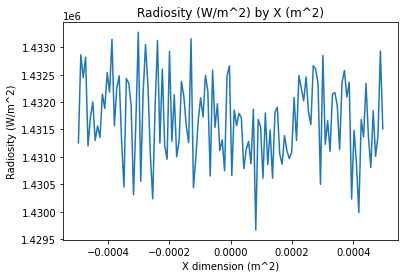

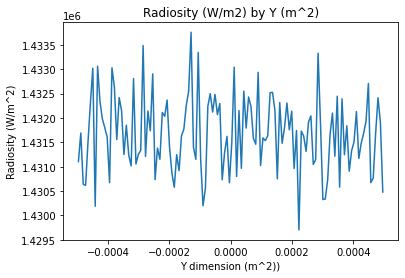

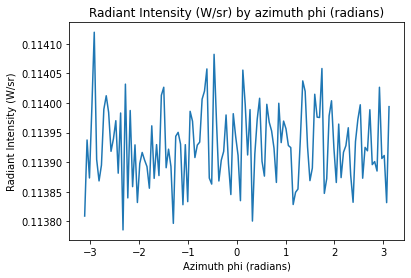

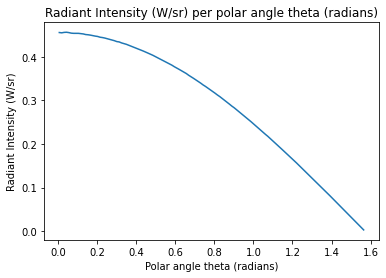

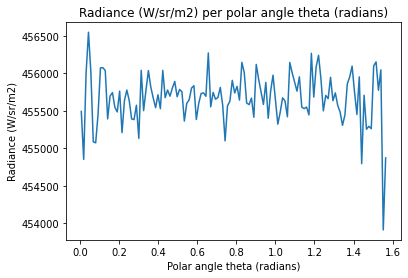

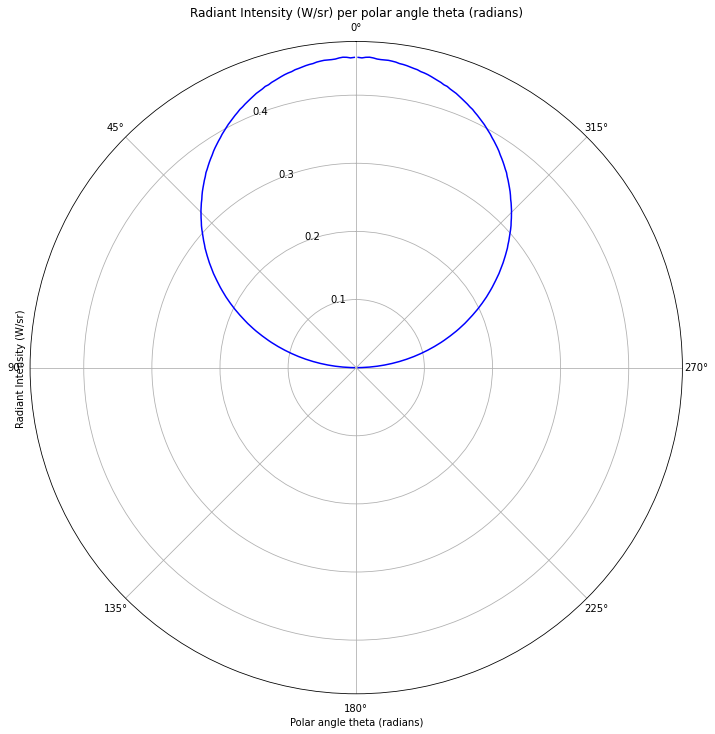

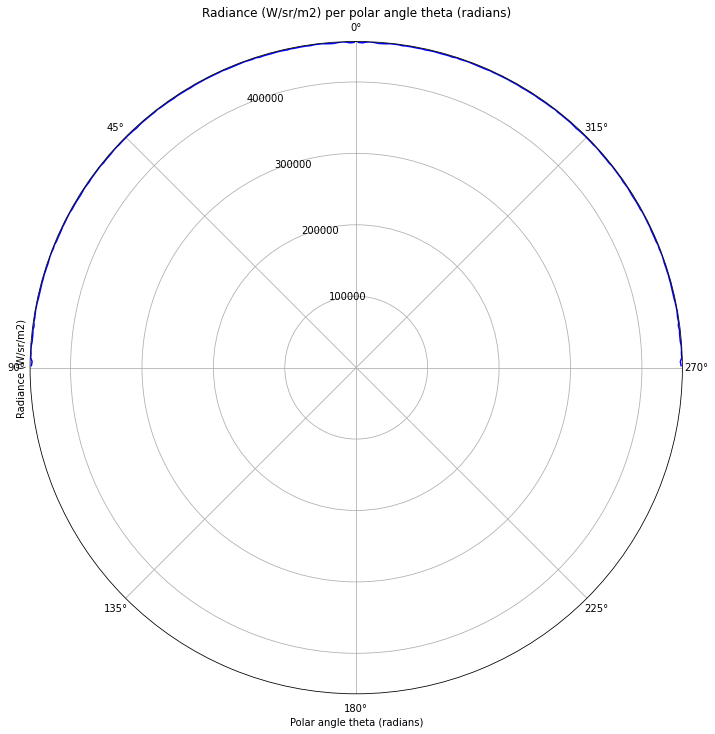

Output()

In [3]:
print(f"LED emitted photons: {results._source_stage._photons_size}")
viz_cuda.plot_all_histograms(results._source_stage)
viz_cuda.plot_stage_3d(results._source_stage)

diffuser incident photons: 337992477


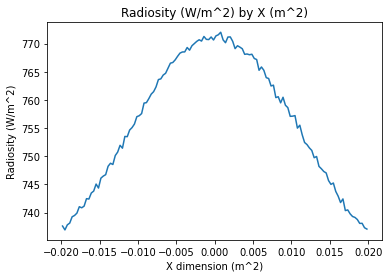

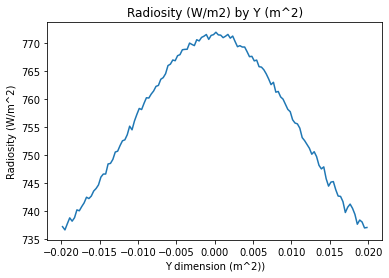

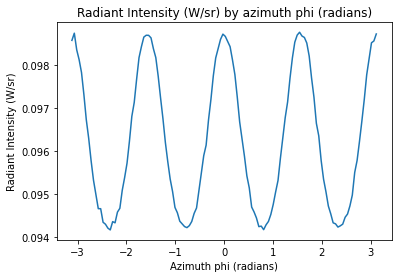

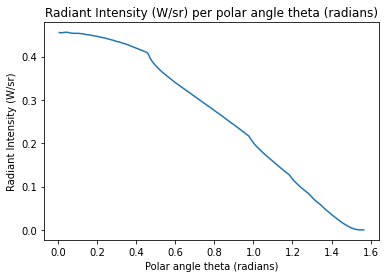

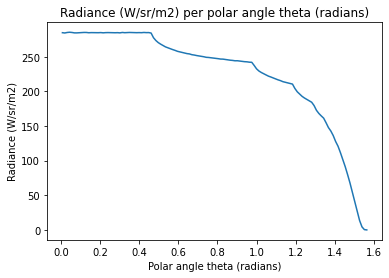

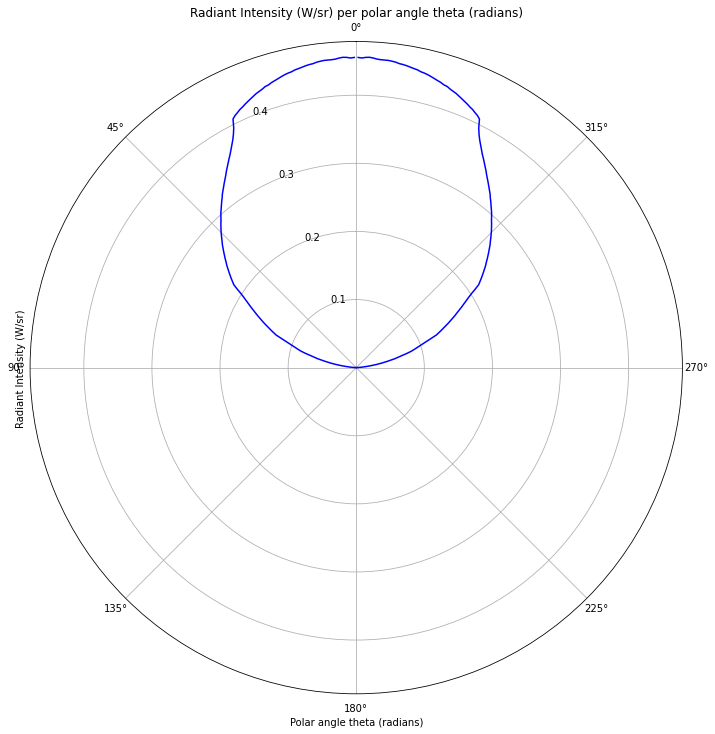

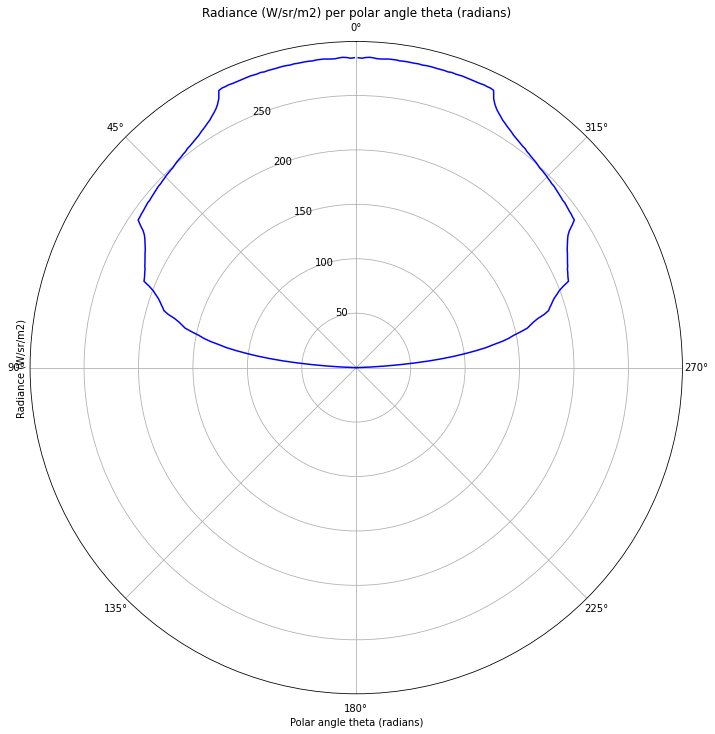

Output()

In [4]:
print(f"diffuser incident photons: {results._box_stage._photons_size}")
viz_cuda.plot_all_histograms(results._box_stage)
viz_cuda.plot_stage_3d(results._box_stage)

diffuser scattered photons: 283916190


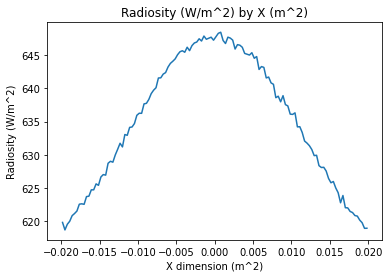

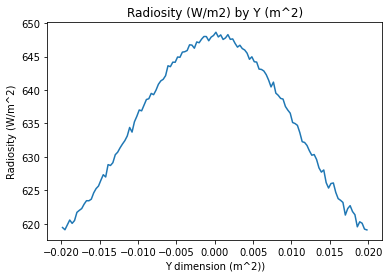

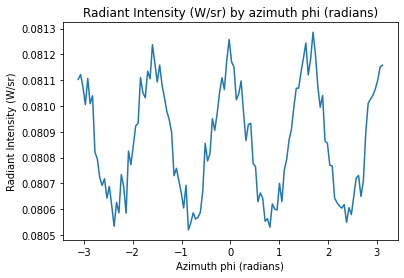

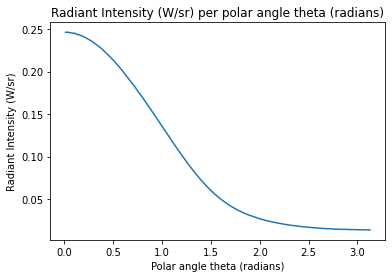

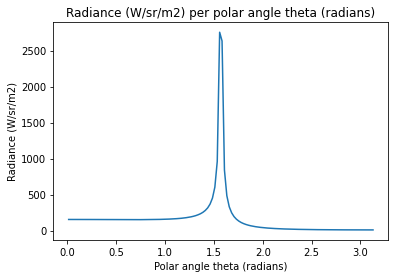

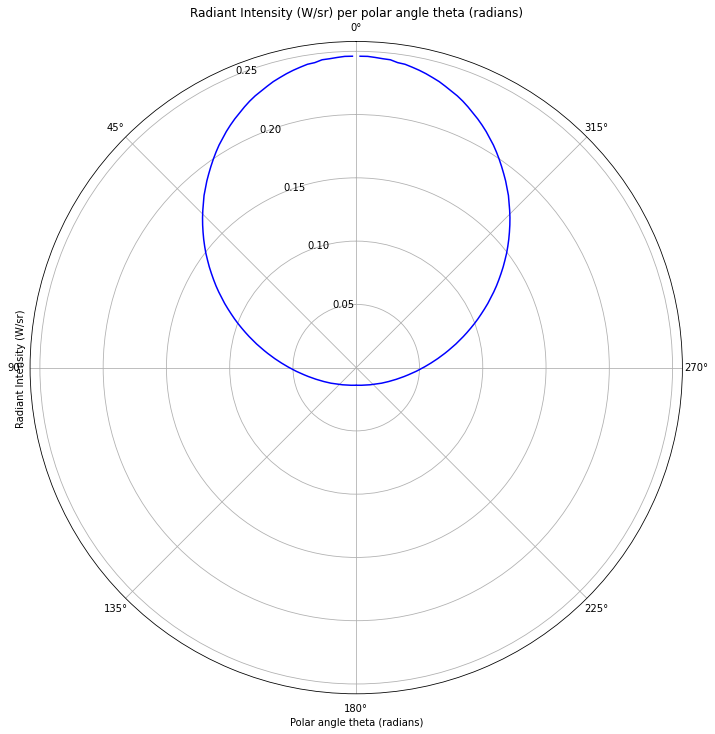

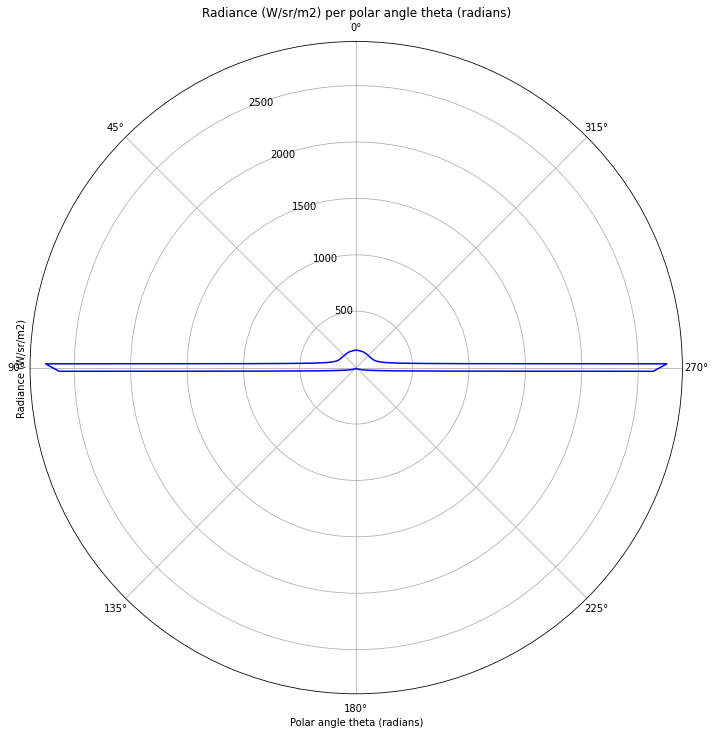

Output()

In [5]:
print(f"diffuser scattered photons: {results._diffuser_stage._photons_size}")
viz_cuda.plot_all_histograms(results._diffuser_stage)
viz_cuda.plot_stage_3d(results._diffuser_stage)

reflector indicent photons: 6853


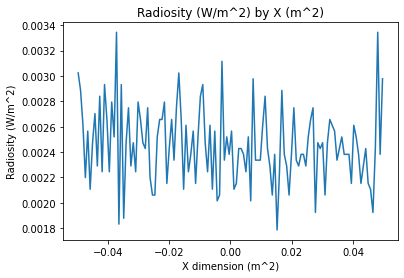

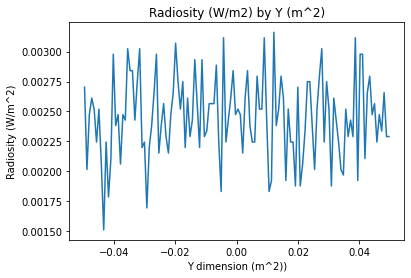

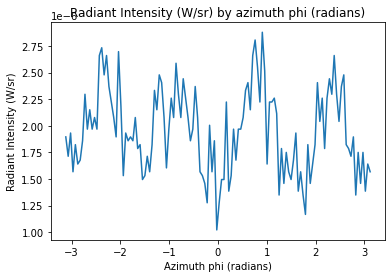

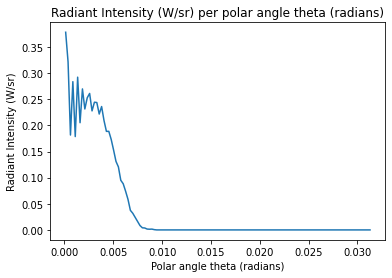

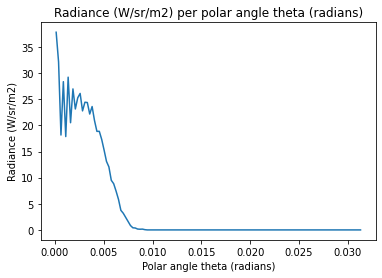

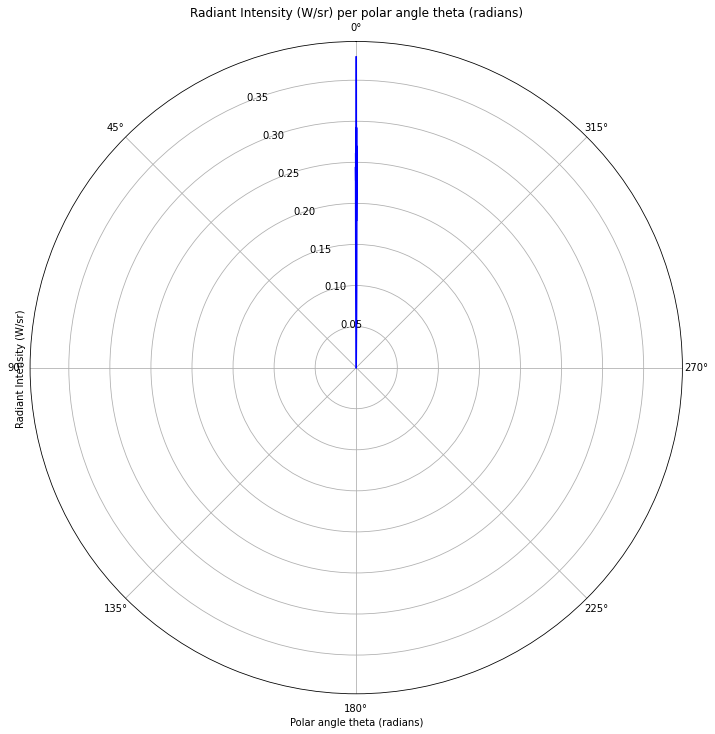

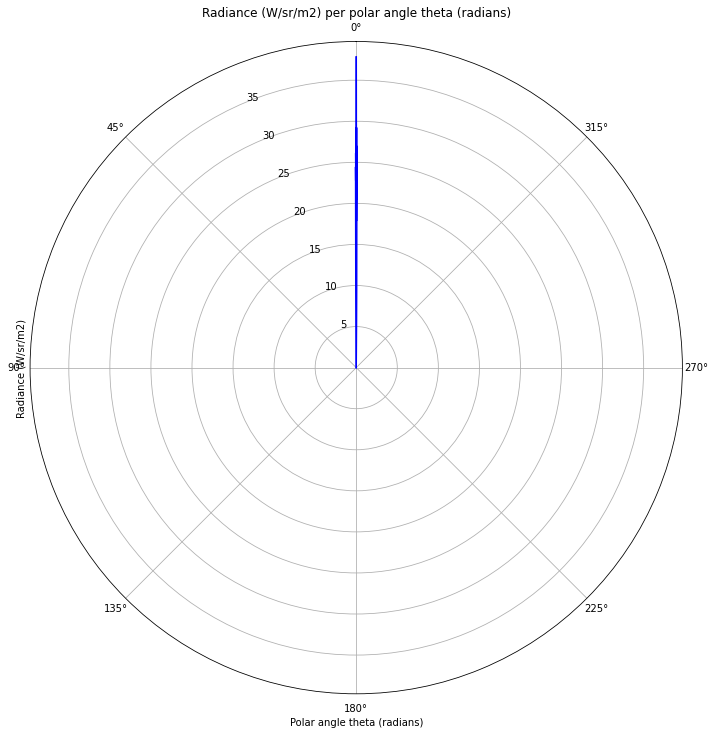

Output()

In [6]:
print(f"reflector indicent photons: {results._outbound_stage._photons_size}")
viz_cuda.plot_all_histograms(results._outbound_stage)
viz_cuda.plot_stage_3d(results._outbound_stage)

reflected photons: 6853


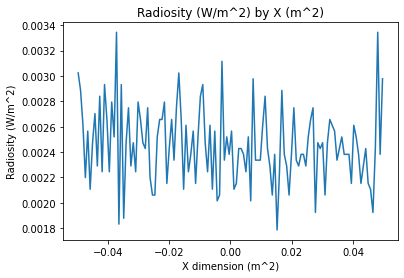

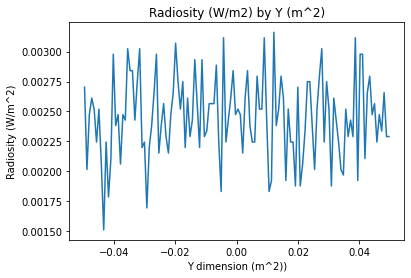

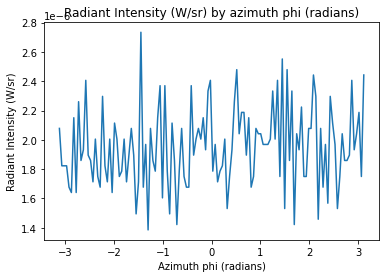

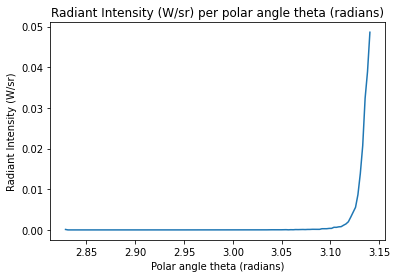

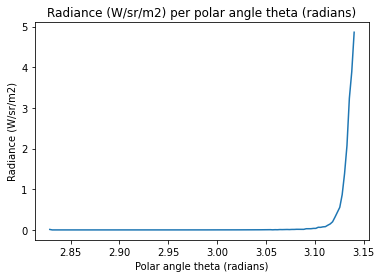

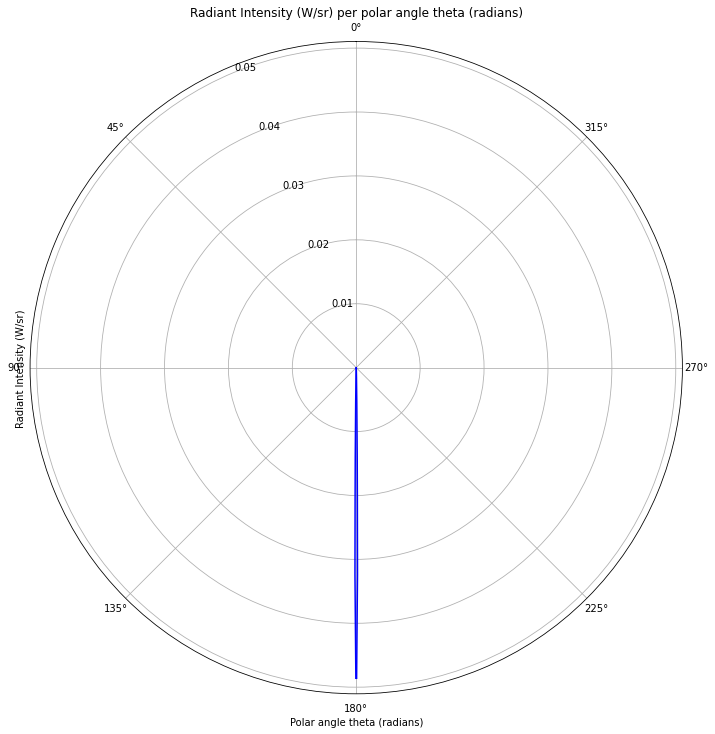

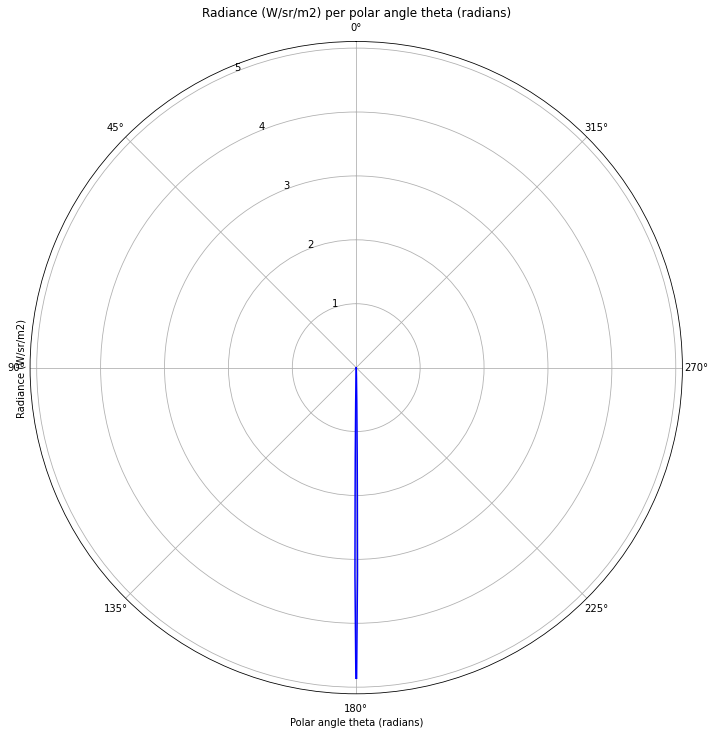

Output()

In [7]:
print(f"reflected photons: {results._inbound_stage._photons_size}")
viz_cuda.plot_all_histograms(results._inbound_stage)
viz_cuda.plot_stage_3d(results._inbound_stage)

camera plane photons: 3074


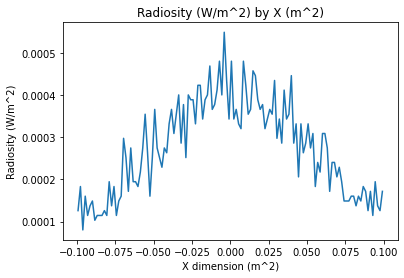

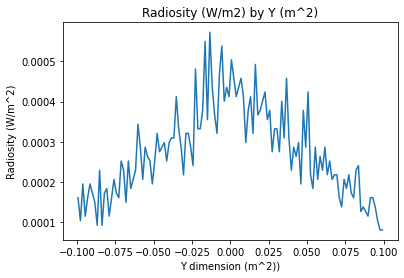

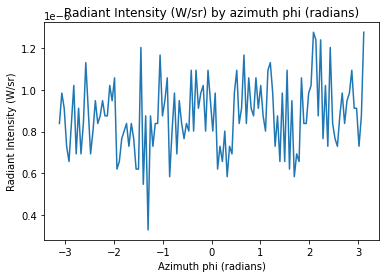

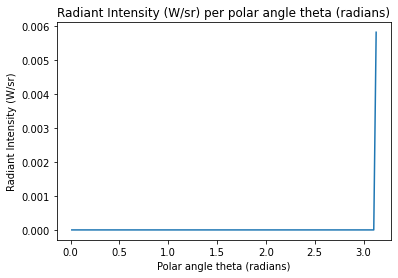

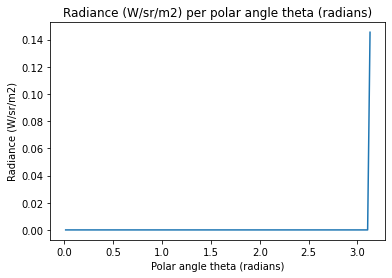

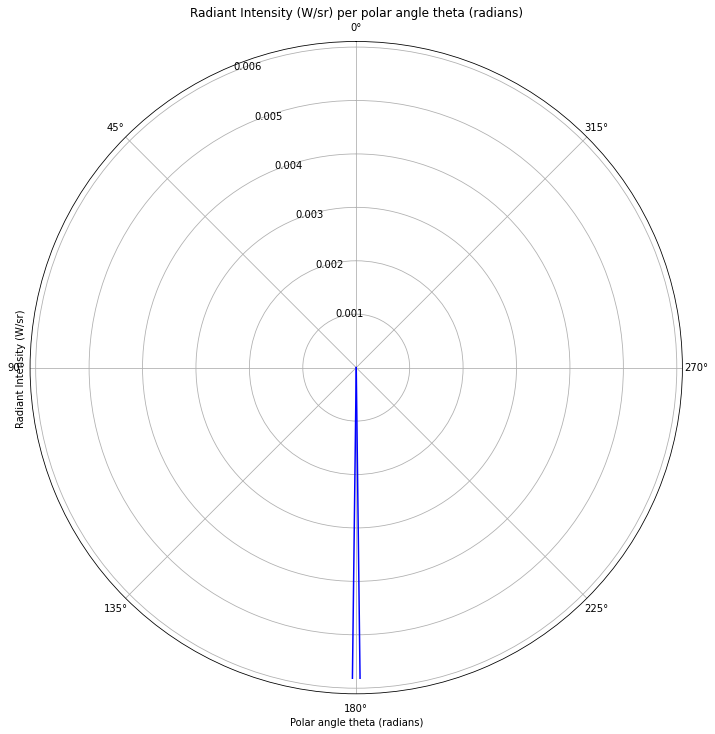

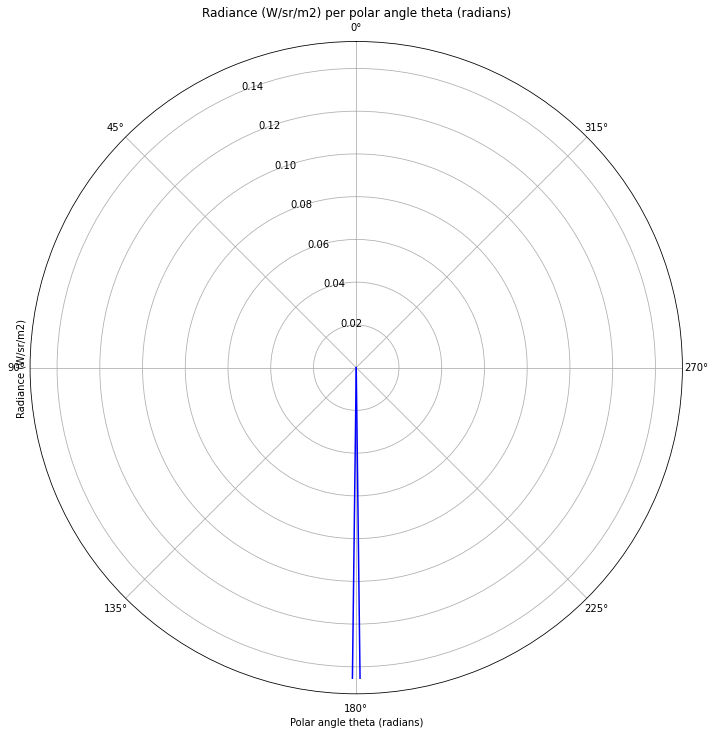

Output()

In [8]:
print(f"camera plane photons: {results._camera_plane_stage._photons_size}")
viz_cuda.plot_all_histograms(results._camera_plane_stage)
viz_cuda.plot_stage_3d(results._camera_plane_stage)